In [14]:
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
x_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

In [5]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle shoes']

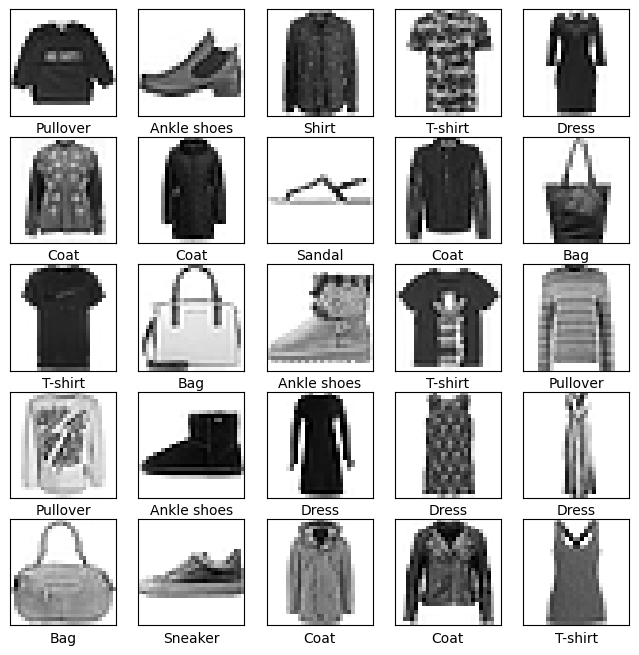

In [6]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.5)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4865 - accuracy: 0.8226 - val_loss: 0.3865 - val_accuracy: 0.8697
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3523 - accuracy: 0.8736 - val_loss: 0.3355 - val_accuracy: 0.8770
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2980 - accuracy: 0.8919 - val_loss: 0.2973 - val_accuracy: 0.8957
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2605 - accuracy: 0.9048 - val_loss: 0.3237 - val_accuracy: 0.8783
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2326 - accuracy: 0.9134 - val_loss: 0.2925 - val_accuracy: 0.8987
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2032 - accuracy: 0.9250 - val_loss: 0.3208 - val_accuracy: 0.8813
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1804 - accuracy: 0.9330 - val_loss: 0.2863 - val_accuracy: 0.9017
Epoch 

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: ", accuracy)

Test Accuracy:  0.9050999879837036


In [15]:
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

     T-shirt       0.90      0.78      0.84      1000
     Trouser       0.98      0.99      0.99      1000
    Pullover       0.91      0.77      0.84      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.82      0.91      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.70      0.80      0.75      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
 Ankle shoes       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



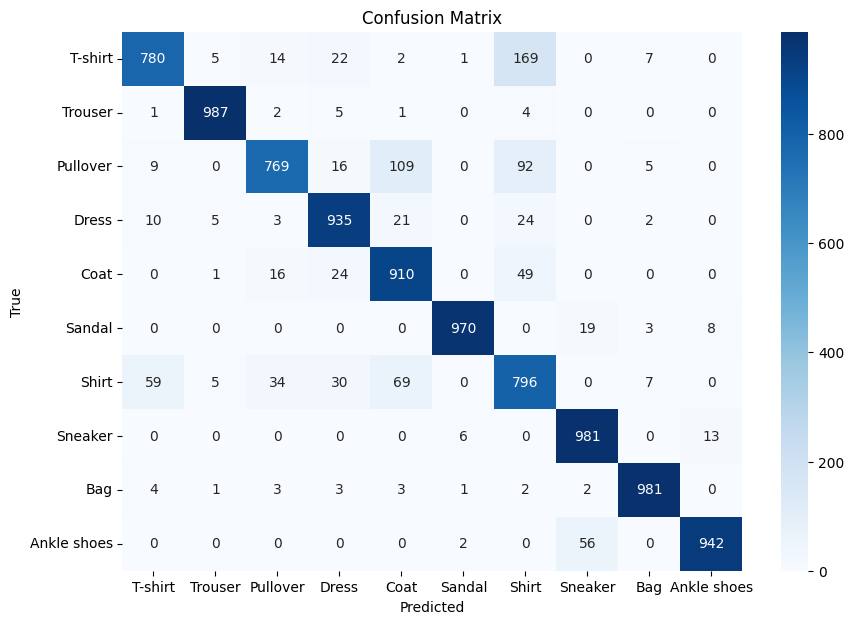

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

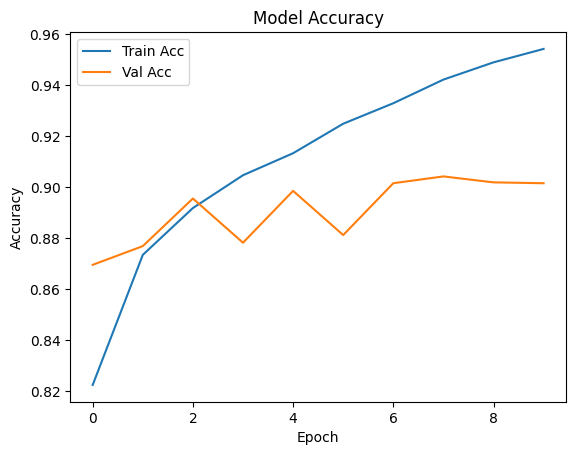

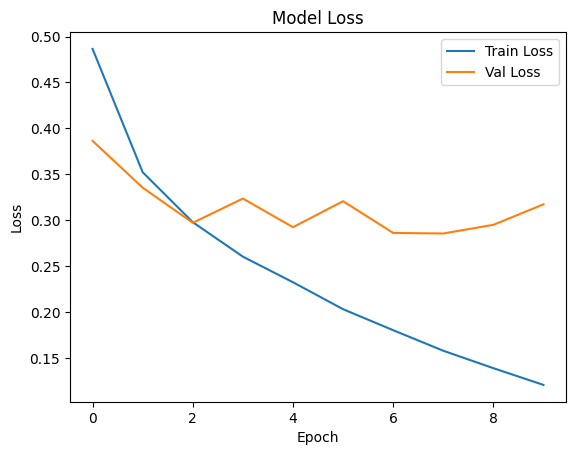

In [19]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

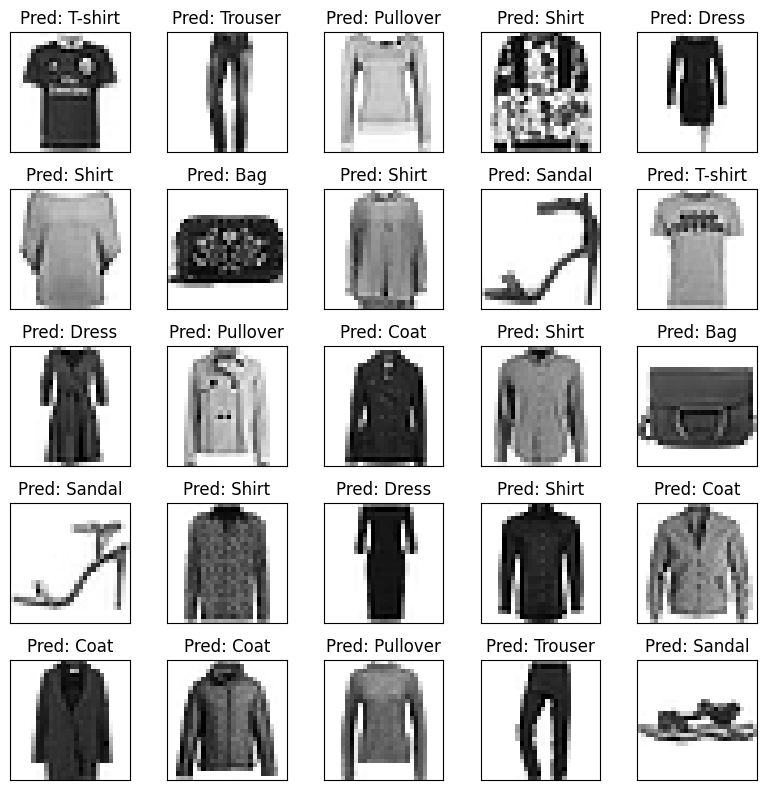

In [20]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_test[i], cmap='binary')
    plt.title(f"Pred: {class_names[y_pred[i]]}")
plt.tight_layout()
plt.show()